# Basic Pandas
Hint: some method needed to solve these exercises have not been introduced so far. Follow the hints and use the ***pandas*** documentation. 

In [2]:
#check if notebook runs in colab
import sys
IN_COLAB = 'google.colab' in sys.modules
print('running in Colab:',IN_COLAB)
path='..'
if IN_COLAB:
  #in colab, we need to clone the data from the repo
  !git clone https://github.com/keuperj/DataScienceSS20.git
  path='DataScienceSS20'

running in Colab: False



### Step 1. Import the necessary libraries

In [3]:
import pandas as pd

### Step 2.
Use ***Jupyter lab*** to browse the data file in ``path+"/DATA/u.user.csv"``. What does this data set represent?

In [4]:
df = pd.read_csv(path+'/DATA/u.user.csv')
print(df.head())
print('------------')
df.info()

   user_id  age gender  occupation zip_code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213
------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


### Step 3. Read the CSV data into a pandas DataFrame. Assign it to a variable called users and use the 'user_id' as index

In [5]:
grouped_users = df.groupby(df['user_id'])

#df2 = pd.DataFrame({'Zahl': ['A','B','C','A'],
 #                  'Zahl2': [4,5,6,7]})
#group = df2.groupby(df2['Zahl'])
#group.first()
#for name, group in group:
    #print("name:", name, "\n", group)

### Step 4. Print the first 25 entries

In [6]:
grouped_users.first().head(25)

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


### Step 5. Print the last 10 entries

In [7]:
grouped_users.first().tail(10)

,age,gender,occupation,zip_code
user_id,,,,
934,61,M,engineer,22902
935,42,M,doctor,66221
936,24,M,other,32789
937,48,M,educator,98072
938,38,F,technician,55038
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229
942,48,F,librarian,78209


### Step 6. What is the number of observations in the dataset?

In [9]:
len(grouped_users)

943

### Step 7. What is the number of columns in the dataset?

In [19]:
print(len(grouped_users.get_group(1).columns)) # Number of Columns in Grouped Dataset
len(df.columns) # Number of Colums in Dataset

4


5

### Step 8. Print the name of all the columns.

In [25]:
print('Grouped Names:', grouped_users.get_group(1).columns)
df.columns

Grouped Names: Index(['age', 'gender', 'occupation', 'zip_code'], dtype='object')


Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

### Step 9. How is the dataset indexed?

In [33]:
print(grouped_users.get_group(1).index)
df.index

Int64Index([0], dtype='int64')


RangeIndex(start=0, stop=943, step=1)

### Step 10. What is the data type of each column?
Hint: this works like in NumPy

In [35]:
print(grouped_users.get_group(1).info())
print('---------------')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         1 non-null      int64 
 1   gender      1 non-null      object
 2   occupation  1 non-null      object
 3   zip_code    1 non-null      object
dtypes: int64(1), object(3)
memory usage: 40.0+ bytes
None
---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


### Step 11. Print only the occupation column

In [47]:
print (grouped_users.get_group(1)['occupation'])
print('-----------------------')
print (grouped_users['occupation'].get_group(3)) # Sage Gruppe 3, aber im Datensatz index 2 (Zählt von 1 los)
print('-----------------------')
df['occupation']

0    technician
Name: occupation, dtype: object
-----------------------
2    writer
Name: occupation, dtype: object
-----------------------


0         technician
1              other
2             writer
3         technician
4              other
           ...      
938          student
939    administrator
940          student
941        librarian
942          student
Name: occupation, Length: 943, dtype: object

### Step 12. How many different occupations there are in this dataset? 
Hint: try the ``nunique()`` function.

In [48]:
df['occupation'].nunique()

21

### Step 13. What is the most frequent occupation?
Hint: ``value_counts()``

In [90]:
df['occupation'].value_counts()[0:1]

student    196
Name: occupation, dtype: int64

### Step 14. Summarize the DataFrame.

In [70]:
print(df.info())
print(df.describe)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None
<bound method NDFrame.describe of      user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librar

### Step 15. Summarize all the columns

In [71]:
print('Columns:', df.columns)
print(df.describe())
print("Gender:", "\n","Number:", df['gender'].value_counts(),"Frequenzy:", df['gender'].nunique(), "\n")
print("Occupation:", "\n","Number:", df['occupation'].value_counts(),"Frequenzy:", df['occupation'].nunique(),"\n")
print("Zip Code:", "\n","Number:", df['zip_code'].value_counts(),"Frequenzy:", df['zip_code'].nunique(),"\n")


Columns: Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')
          user_id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000
Gender: 
 Number: M    670
F    273
Name: gender, dtype: int64 Frequenzy: 2 

Occupation: 
 Number: student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: occupation, dtype: int64 Frequenzy: 21 

Zip Code: 
 Number: 55414    9
55105    6
20009    5
55

### Step 16. Summarize only the occupation column

In [98]:
print('Types of Occupation and their frequenzy:', df['occupation'].value_counts())


Types of Occupation and their frequenzy: student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: occupation, dtype: int64


44.904761904761905

### Step 17. What is the mean age of users?

34.05196182396607

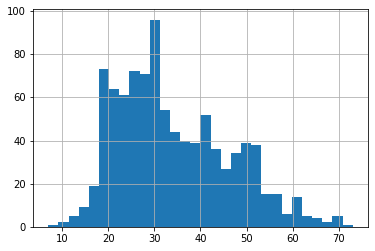

In [193]:
import numpy as np
df['age'].hist(bins=30)
df['age'].mean()

### Step 18. What is the age with least occurrence?

In [278]:
import numpy as np
RelativAges = np.array([[df['age'].value_counts().index.tolist()],[df['age'].value_counts()]])
AgeLeastOccurrence = np.where((RelativAges[1] == 1), RelativAges[0], False)
Boolarray= AgeLeastOccurrence > 0
AgeLeastOccurrence[Boolarray]
#RealtivAges

array([11, 10, 73, 66,  7], dtype=int64)